# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.671535e+01     1.564038e+01
 * time: 0.0014889240264892578
     1     3.124035e+01     7.508237e+00
 * time: 0.006562948226928711
     2     2.705921e+01     4.750822e+00
 * time: 0.012867927551269531
     3     2.196595e+01     2.464505e+00
 * time: 0.01855611801147461
     4     2.165138e+01     3.259125e+00
 * time: 0.04984688758850098
     5     2.020538e+01     2.308914e+00
 * time: 0.05420398712158203
     6     2.015350e+01     3.314060e+00
 * time: 0.05814099311828613
     7     1.921263e+01     1.969157e+00
 * time: 0.06246495246887207
     8     1.909653e+01     4.038676e+00
 * time: 0.06597089767456055
     9     1.908574e+01     2.738182e+00
 * time: 0.06996989250183105
    10     1.894008e+01     2.445090e+00
 * time: 0.07458710670471191
    11     1.831383e+01     2.000000e+00
 * time: 0.07946896553039551
    12     1.772841e+01     1.280615e+00
 * time: 0.08365011215209961
    13     1.736748e+01     7.396536e-01
 * t

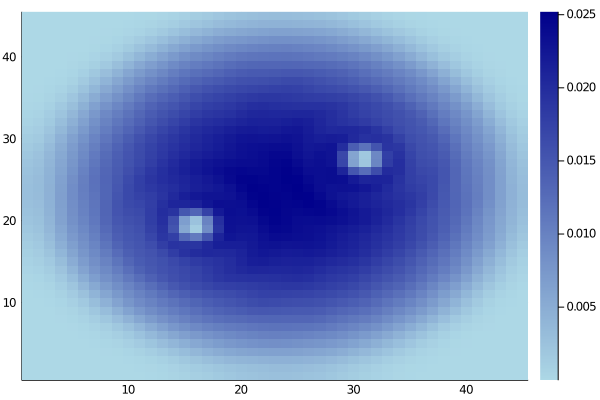

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)